In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Tweets.csv')

In [4]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [5]:
df.drop(['textID','selected_text'],axis=1,inplace=True)

In [6]:
df.head(1)

,text,sentiment
0,"I`d have responded, if I were going",neutral


In [7]:
df['sentiment']=df['sentiment'].replace({'neutral':0,'positive':1,'negative':2})

In [8]:
df.sample(1)

,text,sentiment
506,Thanks for the support,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       27480 non-null  object
 1   sentiment  27481 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 429.5+ KB


In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

text         0
sentiment    0
dtype: int64

In [12]:
df.duplicated().sum()

0

#EDA

In [13]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('punkt')
ps=PorterStemmer()
corpus=[]

[nltk_data] Downloading package stopwords to C:\Users\Atharva
[nltk_data]     Sankhe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Atharva
[nltk_data]     Sankhe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
df['sentiment'].value_counts()

0    11117
1     8582
2     7781
Name: sentiment, dtype: int64

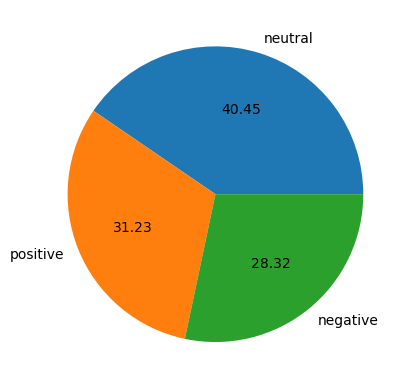

In [15]:
plt.pie(df['sentiment'].value_counts(),labels=['neutral','positive','negative'],autopct="%0.02f")
plt.show()

In [16]:
df['length']=df['text'].apply(len)

In [17]:
df['words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [18]:
df.head()

,text,sentiment,length,words,sentences
0,"I`d have responded, if I were going",0,36,10,1
1,Sooo SAD I will miss you here in San Diego!!!,2,46,13,2
2,my boss is bullying me...,2,25,6,1
3,what interview! leave me alone,2,31,6,2
4,"Sons of ****, why couldn`t they put them on t...",2,75,20,1


In [19]:
df[['length','words','sentences']].describe()

,length,words,sentences
count,27480.000000,27480.000000,27480.000000
mean,68.330022,15.952875,1.700437
std,35.603870,8.558301,0.917579
min,3.000000,1.000000,1.000000
25%,39.000000,9.000000,1.000000
50%,64.000000,15.000000,1.000000
75%,97.000000,22.000000,2.000000
max,141.000000,106.000000,18.000000


<AxesSubplot:xlabel='length', ylabel='Count'>

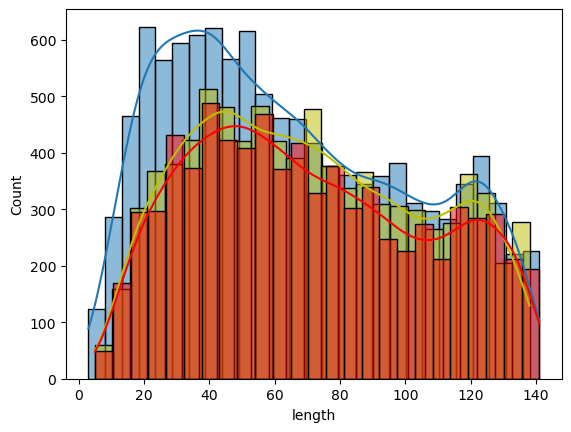

In [20]:
# sns.histplot(data=df['length'],hue=df['sentiment'])
sns.histplot(df[df['sentiment'] == 0]['length'],kde=True)
sns.histplot(df[df['sentiment'] == 1]['length'],color='y',kde=True)
sns.histplot(df[df['sentiment'] == 2]['length'],color='r',kde=True)

<AxesSubplot:>

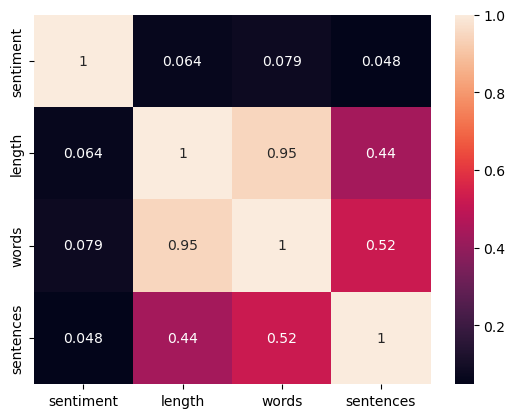

In [21]:
sns.heatmap(df.corr(),annot=True)

Data Cleaning 
steps:  Lower case, 
        Tokenization, 
        Removing special characters, 
        Removing stop words and punctuation, 
        Stemming

In [22]:
def cleaning(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalpha():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english'):
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    text=" ".join(y)
            
    return text

In [23]:
df['text'][1]

' Sooo SAD I will miss you here in San Diego!!!'

In [24]:
cleaning(' Sooo SAD I will miss you here in San Diego!!!')

'sooo sad miss san diego'

In [25]:
df['cleaned']=df['text'].apply(cleaning)

In [26]:
df.sample(5)

,text,sentiment,length,words,sentences,cleaned
5494,city in a bittt.,0,16,5,1,citi bittt
1376,that would mean me babe! but **** it my name...,1,96,27,4,would mean babe name super freakin cool give p...
2389,Because of the new #Kirk. That`s why. Because...,0,64,19,3,new kirk new kirk
17986,not cool. Hope you feel better. I went up t...,0,83,19,3,cool hope feel better went breakfast buy gone
11671,very talented Sam,1,18,3,1,talent sam


In [27]:
!pip3 install wordcloud

In [28]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [29]:
neu_wc = wc.generate(df[df['sentiment'] == 0]['cleaned'].str.cat(sep=" "))

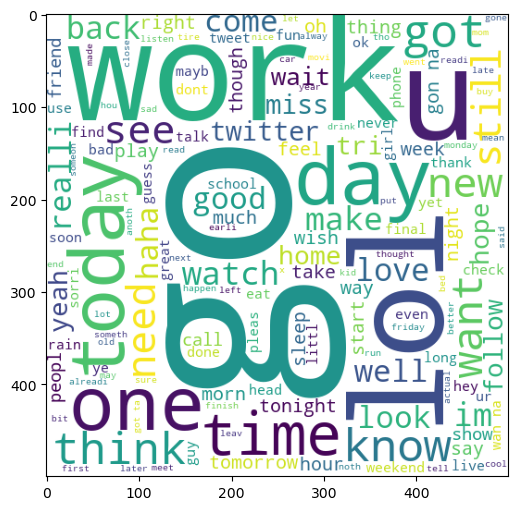

In [30]:
plt.figure(figsize=(15,6))
plt.imshow(neu_wc)

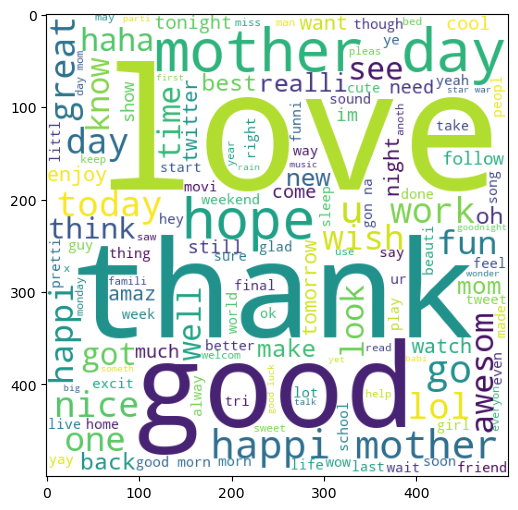

In [31]:
pos_wc=wc.generate(df[df['sentiment']==1]['cleaned'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(pos_wc)

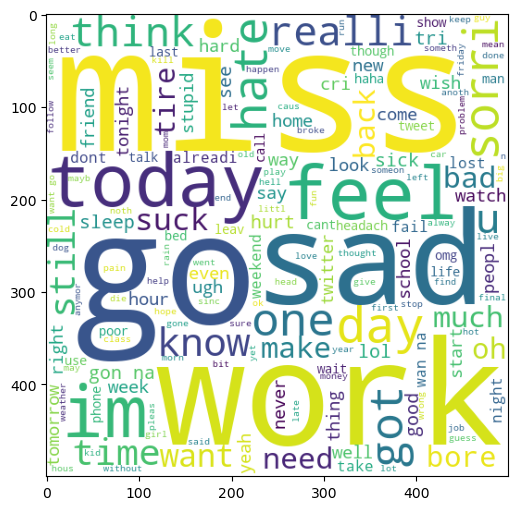

In [32]:
pos_wc=wc.generate(df[df['sentiment']==2]['cleaned'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(pos_wc)

In [33]:
neu_common=[]
for i in df[df['sentiment']==0]['cleaned'].tolist():
    for word in i.split():
        neu_common.append(word)

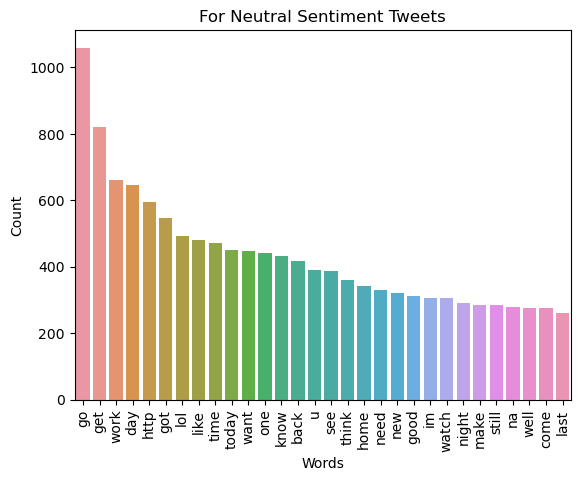

In [34]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(neu_common).most_common(30))[0],y=pd.DataFrame(Counter(neu_common).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.xlabel("Words")
plt.ylabel("Count")
plt.title("For Neutral Sentiment Tweets")
plt.show()

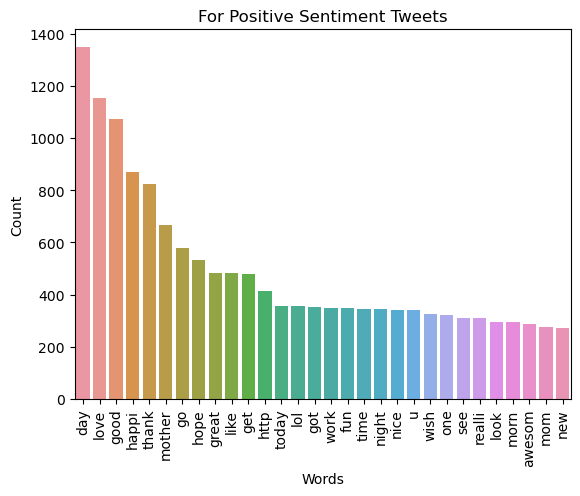

In [35]:
pos_common=[]
for i in df[df['sentiment']==1]['cleaned'].tolist():
    for word in i.split():
        pos_common.append(word)
sns.barplot(x=pd.DataFrame(Counter(pos_common).most_common(30))[0],y=pd.DataFrame(Counter(pos_common).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.xlabel("Words")
plt.ylabel("Count")
plt.title("For Positive Sentiment Tweets")
plt.show()

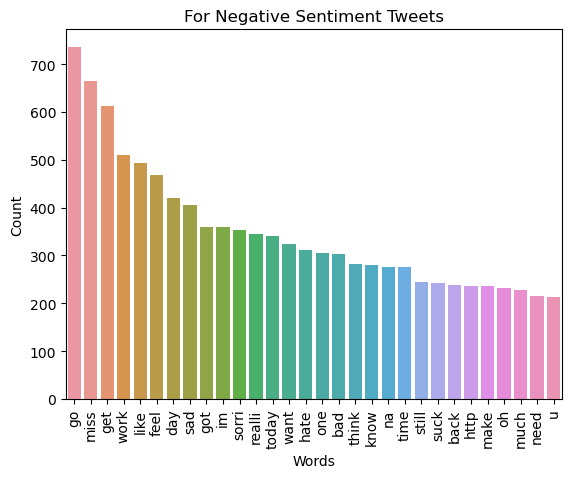

In [36]:
neg_common=[]
for i in df[df['sentiment']==2]['cleaned'].tolist():
    for word in i.split():
        neg_common.append(word)
sns.barplot(x=pd.DataFrame(Counter(neg_common).most_common(30))[0],y=pd.DataFrame(Counter(neg_common).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.xlabel("Words")
plt.ylabel("Count")
plt.title("For Negative Sentiment Tweets")
plt.show()

In [37]:
corpus=df['cleaned'].tolist()

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(corpus).toarray()
y=df['sentiment'].values
# X=cv.fit_transform(df['cleaned']).toarray()

In [42]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [55]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [56]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [51]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))



0.44122998544395925
[[ 242  746 1199]
 [ 155 1060  529]
 [ 149  293 1123]]


In [57]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))


0.6512615235322659
[[2303  526  466]
 [ 734 1734  120]
 [ 860  169 1332]]


In [53]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))


0.6393740902474527
[[1713  239  235]
 [ 621 1057   66]
 [ 736   85  744]]


Hence MultinomialNB is selected since it gives the highest accuracy

In [77]:
def working():
    print("Enter the tweet: ")
    tweet=input()
    tweet=cleaning(tweet)
    list=[]
    list.append(tweet)
    te= cv.transform(list).toarray()
    prediction=mnb.predict(te)
    if prediction==0:
        print("NEUTRAL")
    elif prediction==1:
        print("POSITIVE")
    elif prediction==2:
        print("NEGATIVE")

In [79]:
working()

Enter the tweet: 
Virat kohli is one of the best players of this generation.
POSITIVE
